In [685]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

1.DATA PREPARATION

In [686]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [687]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [688]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [689]:
df_selected = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [690]:
df_selected

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


2.Exploratory data analysis

<AxesSubplot: xlabel='fuel_efficiency_mpg', ylabel='Count'>

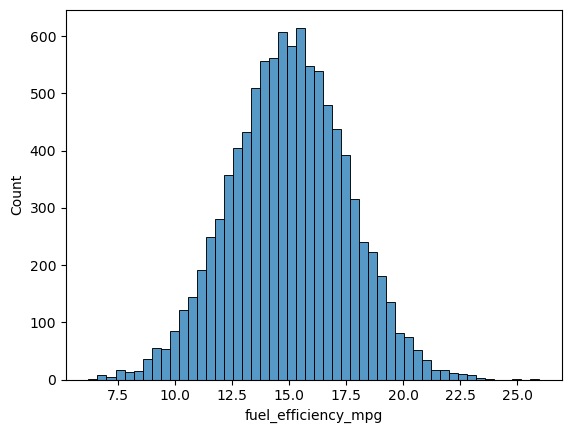

In [691]:
sns.histplot(df_selected['fuel_efficiency_mpg'], bins=50)

In [692]:
df_selected.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [693]:
power_med = df['horsepower'].median()
power_med

149.0

3.Setting up the validation framework

In [694]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [695]:

df_train = df_selected.iloc[idx[:n_train]]
df_val = df_selected.iloc[idx[n_train:n_train+n_val]]
df_test = df_selected.iloc[idx[n_train+n_val:]]

In [696]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [697]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,180,175.0,2775.381743,2014,15.931657
1,160,166.0,3542.655183,2012,13.130355
2,250,173.0,1354.787120,2007,22.858156
3,260,75.0,2531.997079,2005,16.399893
4,250,175.0,2609.369103,2004,17.464552
...,...,...,...,...,...
1935,200,167.0,3470.715658,2003,12.850141
1936,180,144.0,3605.310144,2016,11.681418
1937,180,154.0,3346.965671,2018,13.678140
1938,210,152.0,2500.175687,2020,17.593237


In [698]:
y_train = df_train['fuel_efficiency_mpg']
y_val   = df_val.fuel_efficiency_mpg.values
y_test  = df_test.fuel_efficiency_mpg.values


In [699]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [700]:
y_train.shape

(5824,)

Question 3 and Question 4

In [701]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [702]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

Fillna with zero

In [703]:
base = ['engine_displacement','horsepower', 'vehicle_weight','model_year']

X_train_na = df_train[base].fillna(0).values

w0, w = train_linear_regression_reg(X_train_na, y_train, r=0.001)

y_pred = w0 + df_val.dot(w)
result_na = round(rmse(y_val,y_pred),2)
print(result_na)

0.5


In [704]:
rl = [0, 0.01, 0.1, 1, 5, 10, 100]
for r in rl:
    w0, w = train_linear_regression_reg(X_train_na, y_train, r)
    y_pred = w0 + df_val.dot(w)
    result_na_r = rmse(y_val,y_pred)
    print(r,'---',result_na_r)

0 --- 0.4964111668066828
0.01 --- 0.49634669050503716
0.1 --- 0.49852788553458466
1 --- 0.5021921569256531
5 --- 0.5028598785750397
10 --- 0.5029507222813188
100 --- 0.5030341223590341


Fillna with median 

In [705]:
val_mean =  df_val.horsepower.mean()
base = ['engine_displacement','horsepower', 'vehicle_weight','model_year']
X_train_med = df_train[base].fillna(val_mean).values
w0, w = train_linear_regression_reg(X_train_med, y_train,r=0.001)
y_pred = w0 + df_val.dot(w)
result_med = round(rmse(y_val,y_pred),2)
print( result_med)


0.45


In [706]:
for r in rl:
    w0, w = train_linear_regression_reg(X_train_med, y_train, r)
    y_pred = w0 + df_val.dot(w)
    result_na_r = rmse(y_val,y_pred)
    print(r,'---',result_na_r)

0 --- 0.4508780918676093
0.01 --- 0.4511494977855295
0.1 --- 0.4547642565105423
1 --- 0.4596348286806327
5 --- 0.4604886100855438
10 --- 0.46060425571665065
100 --- 0.46071019788290907


QUESTION 5

In [707]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [708]:
w0, w = train_linear_regression(X_train_na, y_train)
y_pred = w0 + df_val.dot(w)
result_q5 = round(rmse(y_val,y_pred),5)
print(result_q5)


0.49641


In [709]:

# ls = []
ls.append(result_q5)
print(ls)

[0.49889, 0.50112, 0.49835, 0.48992, 0.49167, 0.49785, 0.50651, 0.49165, 0.48434, 0.49641]


In [710]:
ls_np = np.array(ls)

In [711]:
np.std(ls)

0.006030345678317294

Question 6

In [715]:
df_train_1 = pd.concat((df_train, df_val))
y_train_1  = np.concatenate((y_train, y_val)) 


In [719]:
len(df_train) + len(df_val)

7764

In [720]:
base = ['engine_displacement','horsepower', 'vehicle_weight','model_year']

X_train_na_1 = df_train_1[base].fillna(0).values

w0, w = train_linear_regression_reg(X_train_na_1, y_train_1, r=0.001)
y_pred = w0 + df_test.dot(w)
result = rmse(y_test,y_pred)
print(result)

0.4982088124941056
